# Dataiku test
Christopher Shih

## Table of Contents
### Import Files
 - [Import the learning and text files](#import)
 - [Clean Not in Universe/?/NA values](#clean)

### Plot Variables
 - [Plot Continuous Variables](#plot continuous)
 - [Plot Categorical Variables](#plot categorical) 
 - [Plot a few variables to get a sense of Train vs. Test & Target variable](#train vs test) 

### Additional Data Cleaning (Outliers/Binning/Binarisation)
 - [Remove Additional Outliers](#additional outliers)
 - [Binning Continuous Variables and Binarisation of Categorical Variables](#Binning & Binarisation)
 
### Train & Cross-Validate Classifiers
 - [Train Logistic Regression & Run ROC AUC metrics](#Logistic Regression)
 - [Train XGBoost & Run ROC AUC metrics](#XGBoost)
 - [Plot Feature Importances](#Feature Importances)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_row',1000)
pd.set_option('display.max_columns',50)
plt.style.use('seaborn-colorblind')

<a id='import'></a>

## Import the learning and text files


In [2]:
%%time
# import data
column_names = ['age','worker_class','industry','occupation','education','wage_per_hour','enrolled_in_education','marital_status'
          ,'major_industry_code','major_occupation_code','race','hispanic','sex','labor_union','reason_for_unemployment'
          ,'full_or_part_time','cap_gains','cap_losses','dividends','tax_filer_status','region_of_prev_res','state_of_prev_res'
          ,'family_status','hh_summary','instance_weight','migration_msa','migration_reg','move_within_reg','live_in_house_1_year'
               ,'migration_prev_sunbelt','family_members_under_18','presence_of_parents','country_of_birth_father'
               ,'country_of_birth_mother','country_of_birth_self','citizenship','var0','var1','var2','weeks_worked','var3'
                ,'target']
df_train = pd.read_csv(r'D:\Kaggle\Dataiku\us_census_full\census_income_learn.csv',header=None,index_col=False,names=column_names)
df_test = pd.read_csv(r'D:\Kaggle\Dataiku\us_census_full\census_income_test.csv',header=None,index_col=False,names=column_names)


Wall time: 3.49 s


## Quickly examine data

In [4]:
df_train.head()

,age,worker_class,industry,occupation,education,wage_per_hour,enrolled_in_education,marital_status,major_industry_code,major_occupation_code,race,hispanic,sex,labor_union,reason_for_unemployment,full_or_part_time,cap_gains,cap_losses,dividends,tax_filer_status,region_of_prev_res,state_of_prev_res,family_status,hh_summary,instance_weight,migration_msa,migration_reg,move_within_reg,live_in_house_1_year,migration_prev_sunbelt,family_members_under_18,presence_of_parents,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,var0,var1,var2,weeks_worked,var3,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                        199523 non-null int64
worker_class               199523 non-null object
industry                   199523 non-null int64
occupation                 199523 non-null int64
education                  199523 non-null object
wage_per_hour              199523 non-null int64
enrolled_in_education      199523 non-null object
marital_status             199523 non-null object
major_industry_code        199523 non-null object
major_occupation_code      199523 non-null object
race                       199523 non-null object
hispanic                   199523 non-null object
sex                        199523 non-null object
labor_union                199523 non-null object
reason_for_unemployment    199523 non-null object
full_or_part_time          199523 non-null object
cap_gains                  199523 non-null int64
cap_losses                 199523 non-null i

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99762 entries, 0 to 99761
Data columns (total 42 columns):
age                        99762 non-null int64
worker_class               99762 non-null object
industry                   99762 non-null int64
occupation                 99762 non-null int64
education                  99762 non-null object
wage_per_hour              99762 non-null int64
enrolled_in_education      99762 non-null object
marital_status             99762 non-null object
major_industry_code        99762 non-null object
major_occupation_code      99762 non-null object
race                       99762 non-null object
hispanic                   99762 non-null object
sex                        99762 non-null object
labor_union                99762 non-null object
reason_for_unemployment    99762 non-null object
full_or_part_time          99762 non-null object
cap_gains                  99762 non-null int64
cap_losses                 99762 non-null int64
dividends      

In [3]:
iscontinuous = [0,5,16,17,18,24]
for i in iscontinuous:
    print(df_train.columns[i])

age
wage_per_hour
cap_gains
cap_losses
dividends
instance_weight


## Find distinct variable values

In [5]:
# number of distinct variable values
for col in column_names:
    print(col+' '+str(len(df_train[col].unique())))

age 91
worker_class 9
industry 52
occupation 47
education 17
wage_per_hour 1240
enrolled_in_education 3
marital_status 7
major_industry_code 24
major_occupation_code 15
race 5
hispanic 10
sex 2
labor_union 3
reason_for_unemployment 6
full_or_part_time 8
cap_gains 132
cap_losses 113
dividends 1478
tax_filer_status 6
region_of_prev_res 6
state_of_prev_res 51
family_status 38
hh_summary 8
instance_weight 99800
migration_msa 10
migration_reg 9
move_within_reg 10
live_in_house_1_year 3
migration_prev_sunbelt 4
family_members_under_18 7
presence_of_parents 5
country_of_birth_father 43
country_of_birth_mother 43
country_of_birth_self 43
citizenship 5
var0 3
var1 3
var2 3
weeks_worked 53
var3 2
target 2


In [7]:
# distinct values in categorical variables
for col in column_names:
    print(col)
    print(pd.unique(df_train[col].ravel()))

age
[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2  1
 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50 24 17
 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75 44 59 60
 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]
worker_class
[' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']
industry
[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5 11
  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21 28 20
 51 10]
occupation
[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13 18
  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]
education
[' High school graduate' ' Some college but no degree' ' 10th grade'
 ' Children' ' Bachelors degree(BA AB BS)'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' Less than 1st grade'
 '

<a id='clean'></a>

## Change ?/Not in universe to NaN

In [4]:
df_train_raw = df_train

In [5]:
def convertNaN(df):
    df = df.replace([' Not in universe',' Not in universe or children',' ?',' Do not know',' NA'],np.NaN)
    return df

In [6]:
%%time
df_train = convertNaN(df_train)
df_test = convertNaN(df_test)

Wall time: 1.23 s


<a id='plot continuous'></a>

## Plot continuous variables
- Quick statistic based an univariate audit of different columns
- Visual representation of variable distribution

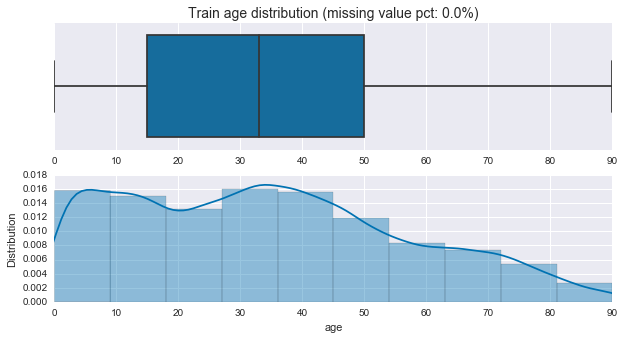

In [101]:
col_name = 'age'

#find percent missing values
perc_missing = 100.*df_train.isnull().sum()[col_name]/len(df_train.index)

#plot
hist = plt.figure(figsize=(10,5))
ax=hist.add_subplot(2,1,1)
sns.boxplot(df_train[col_name])
plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
plt.xlabel('')
xmin,xmax = ax.get_xlim()

ax=hist.add_subplot(2,1,2)
sns.distplot(df_test[col_name],bins=10)
plt.xlabel(col_name)
plt.ylabel('Distribution')
plt.xlim(xmin,xmax)

plt.show()

At first glance, age values do not have any major outliers and all training cases have age values

### Notes:
The following plots must be taken with a grain of salt:
- Over 90% of values were omitted due to being 0
- Several of these values may be valid (e.g. unemployed individuals, those without investment income, etc.); however, the majority are likely not in universe

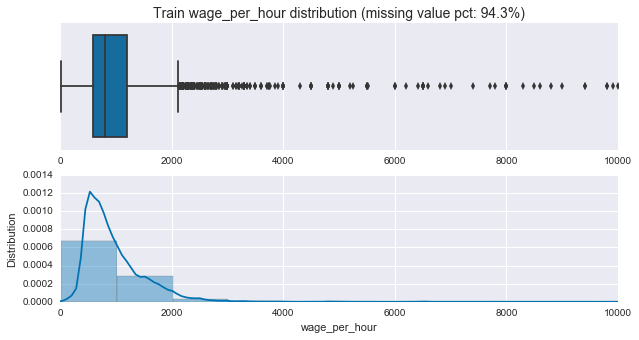

In [44]:
col_name = 'wage_per_hour'

#find percent missing values
perc_missing = 100.*df_train[df_train[col_name]==0].groupby(col_name).size()[0]/len(df_train.index)

#plot
hist = plt.figure(figsize=(10,5))
ax=hist.add_subplot(2,1,1)
sns.boxplot(df_train[df_train[col_name]!=0][col_name])
plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
plt.xlabel('')
xmin,xmax = ax.get_xlim()

ax=hist.add_subplot(2,1,2)
sns.distplot(df_train[df_train[col_name]!=0][col_name],bins=10)
plt.xlabel(col_name)
plt.ylabel('Distribution')
plt.xlim(xmin,xmax)

plt.show()

Wage per hour values have numerous 0's (94.3%) and are thus, not likely to be a large contributing factor to the overall model. Similarly, there seem to be several outliers which need to be removed.

However, given the fact that we plan to model annual income, the valid wage per hour values that we do have are likely to be at least be somewhat indicative


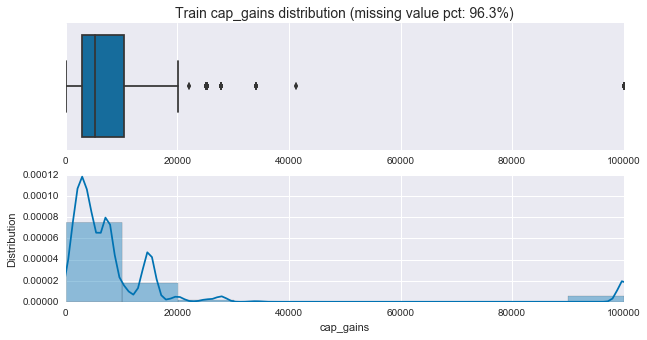

In [10]:
col_name = 'cap_gains'

#find percent missing values
perc_missing = 100.*df_train[df_train[col_name]==0].groupby(col_name).size()[0]/len(df_train.index)

#plot
hist = plt.figure(figsize=(10,5))
ax=hist.add_subplot(2,1,1)
sns.boxplot(df_train[df_train[col_name]!=0][col_name])
plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
plt.xlabel('')
xmin,xmax = ax.get_xlim()

ax=hist.add_subplot(2,1,2)
sns.distplot(df_train[df_train[col_name]!=0][col_name],bins=10)
plt.xlabel(col_name)
plt.ylabel('Distribution')
plt.xlim(xmin,xmax)

plt.show()

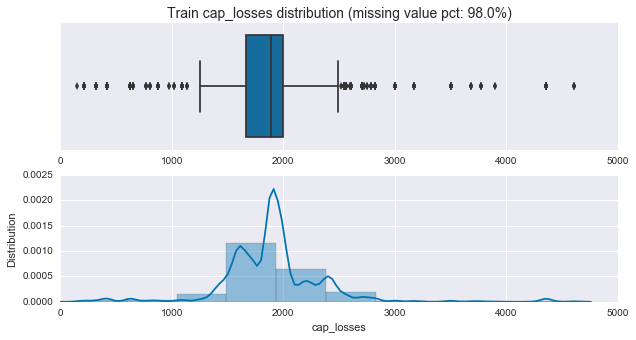

In [11]:
col_name = 'cap_losses'

#find percent missing values
perc_missing = 100.*df_train[df_train[col_name]==0].groupby(col_name).size()[0]/len(df_train.index)

#plot
hist = plt.figure(figsize=(10,5))
ax=hist.add_subplot(2,1,1)
sns.boxplot(df_train[df_train[col_name]!=0][col_name])
plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
plt.xlabel('')
xmin,xmax = ax.get_xlim()

ax=hist.add_subplot(2,1,2)
sns.distplot(df_train[df_train[col_name]!=0][col_name],bins=10)
plt.xlabel(col_name)
plt.ylabel('Distribution')
plt.xlim(xmin,xmax)

plt.show()

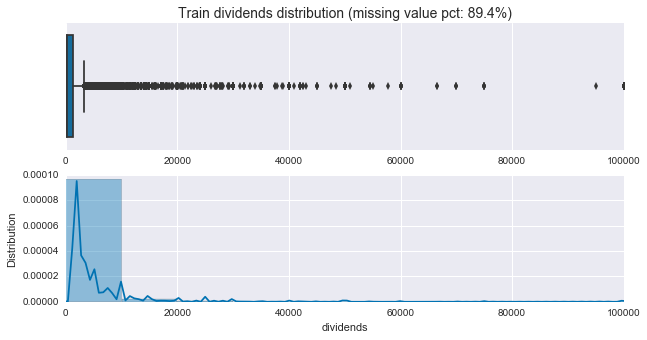

In [126]:
col_name = 'dividends'

#find percent missing values
perc_missing = 100.*df_train[df_train[col_name]==0].groupby(col_name).size()[0]/len(df_train.index)

#plot
hist = plt.figure(figsize=(10,5))
ax=hist.add_subplot(2,1,1)
sns.boxplot(df_train[df_train[col_name]!=0][col_name])
plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
plt.xlabel('')
#plt.xlim(0,5000)
xmin,xmax = ax.get_xlim()

ax=hist.add_subplot(2,1,2)
sns.distplot(df_train[df_train[col_name]!=0][col_name],bins=10)
plt.xlabel(col_name)
plt.ylabel('Distribution')
plt.xlim(xmin,xmax)

plt.show()

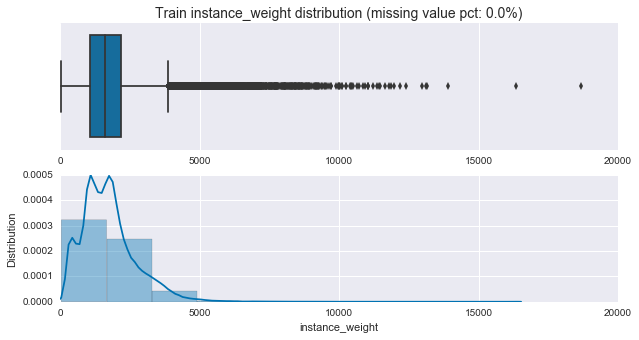

In [13]:
col_name = 'instance_weight'

#find percent missing values
perc_missing = 100.*df_train.isnull().sum()[col_name]/len(df_train.index)

#plot
hist = plt.figure(figsize=(10,5))
ax=hist.add_subplot(2,1,1)
sns.boxplot(df_train[col_name])
plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
plt.xlabel('')
xmin,xmax = ax.get_xlim()

ax=hist.add_subplot(2,1,2)
sns.distplot(df_test[col_name],bins=10)
plt.xlabel(col_name)
plt.ylabel('Distribution')
plt.xlim(xmin,xmax)

plt.show()

As a whole, the continuous variables (aside from age) need to be cleaned for use in future models. Several values fall beyond 1.5x the IQR in each boxplot.

In order to ensure that slight variations in these variables will not skew overall model prediction, continuous values will also be binned before input into models.

<a id='plot categorical'></a>
## Plot Categorical Variables
- Consider missing value %
- Determine variable distribution

In [7]:
iscategorical = []
for i in range(len(df_train.columns)):
    if i in iscontinuous or i==len(df_train.columns)-1:
        continue
    iscategorical.append(i)

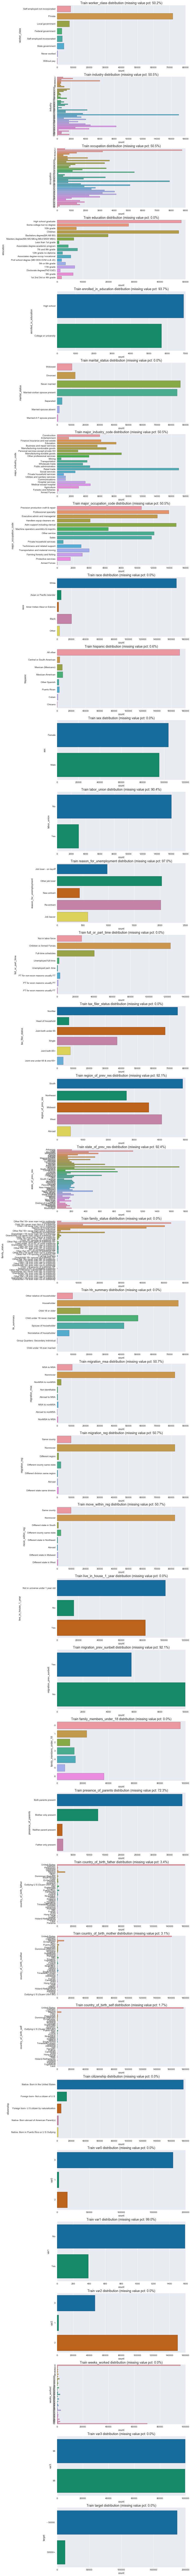

In [23]:
#plot
fig = plt.figure(figsize=(10,200))
j = 1
df_train_nulls = df_train.isnull().sum()

for i in iscategorical:
    #get column
    col_name = df_train.columns[i]
    
    #find percent missing values
    if col_name in ['industry','occupation']:
        perc_missing = 100.*df_train[df_train[col_name]==0].groupby(col_name).size()[0]/len(df_train.index)
    else:
        perc_missing = 100.*df_train_nulls[col_name]/len(df_train.index)
    
    #plot
    if col_name in ['industry','occupation']:
        ax=fig.add_subplot(len(iscategorical),1,j)
        sns.countplot(y=col_name,data = df_train[df_train[col_name]!=0])
        plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
        j+=1
    else:
        ax=fig.add_subplot(len(iscategorical),1,j)
        sns.countplot(y=col_name,data = df_train)
        plt.title('Train {} distribution (missing value pct: {:.1f}%)'.format(col_name,perc_missing), fontsize=14)
        j+=1

<a id='train vs test'></a>
## Plot a few variables to get a sense of Train vs. Test

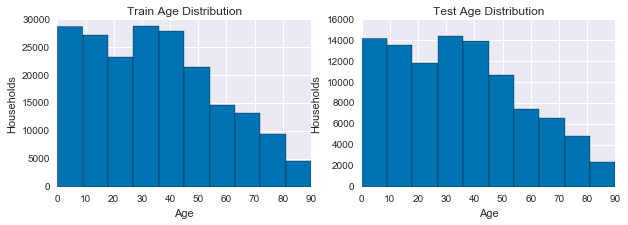

In [17]:
# plot distribution of age for train & test set to see if there are abnormalities and/or differences
age_hist = plt.figure(figsize=(10,3))
ax=age_hist.add_subplot(1,2,1)
ax.hist(df_train['age'],bins=10)
plt.title('Train Age Distribution')
plt.xlabel('Age')
plt.ylabel('Households')
ax=age_hist.add_subplot(1,2,2)
ax.hist(df_test['age'],bins=10)
plt.title('Test Age Distribution')
plt.xlabel('Age')
plt.ylabel('Households')
plt.show()

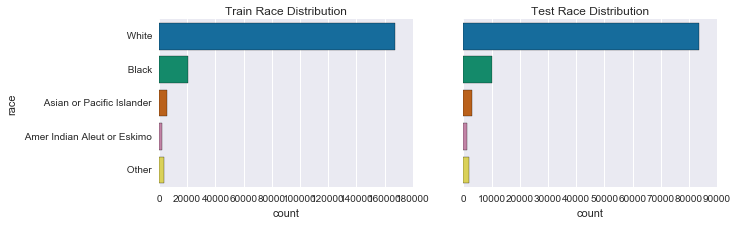

In [145]:
fig = plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,2,1)
ax = sns.countplot(y='race',data = df_train,
                   order=[' White',' Black',' Asian or Pacific Islander',' Amer Indian Aleut or Eskimo',' Other'])
plt.title('Train Race Distribution')
ax=fig.add_subplot(1,2,2)
ax = sns.countplot(y='race',data = df_test,
                  order=[' White',' Black',' Asian or Pacific Islander',' Amer Indian Aleut or Eskimo',' Other'])
plt.title('Test Race Distribution')
plt.ylabel('')
ax.set_yticklabels('')
plt.show()

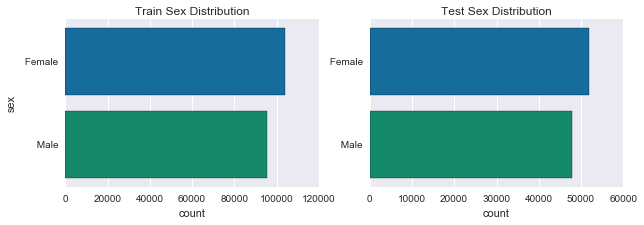

In [147]:
fig = plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,2,1)
ax = sns.countplot(y='sex',data = df_train,
                   order=[' Female',' Male'])
plt.title('Train Sex Distribution')
ax=fig.add_subplot(1,2,2)
ax = sns.countplot(y='sex',data = df_test,
                  order=[' Female',' Male'])
plt.title('Test Sex Distribution')
plt.ylabel('')
plt.show()

As one might expect, train & test age/race/sex appear similarly distributed

## Check out a few variables with relation to the target variable

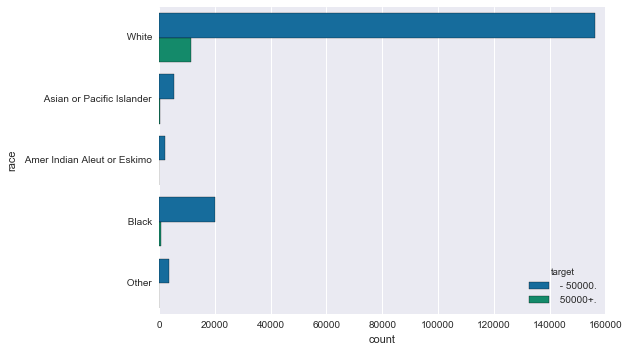

race
 Amer Indian Aleut or Eskimo    0.021768
 Asian or Pacific Islander      0.073693
 Black                          0.026451
 Other                          0.024884
 White                          0.067350
dtype: float64


In [150]:
ax = sns.countplot(y='race',hue='target',data = df_train)
tot_counts = df_train.groupby('race').size()
target_counts = df_train[df_train['target']==' 50000+.'].groupby('race').size()

target_pct = target_counts/tot_counts
plt.show()
print(target_pct)

There seems to be a slightly higher occurrence of 50K+ incomes among Asian or Pacific Islander and White races in this dataset

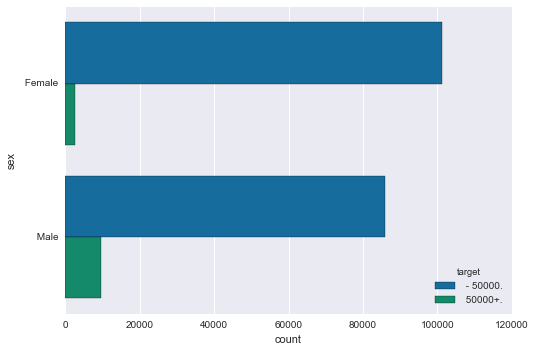

sex
 Female    0.025610
 Male      0.101728
dtype: float64


In [149]:
ax = sns.countplot(y='sex',hue='target',data = df_train)
tot_counts = df_train.groupby('sex').size()
target_counts = df_train[df_train['target']==' 50000+.'].groupby('sex').size()

target_pct = target_counts/tot_counts
plt.show()
print(target_pct)

Males also have a slightly higher percentage of 50K+ in the dataset

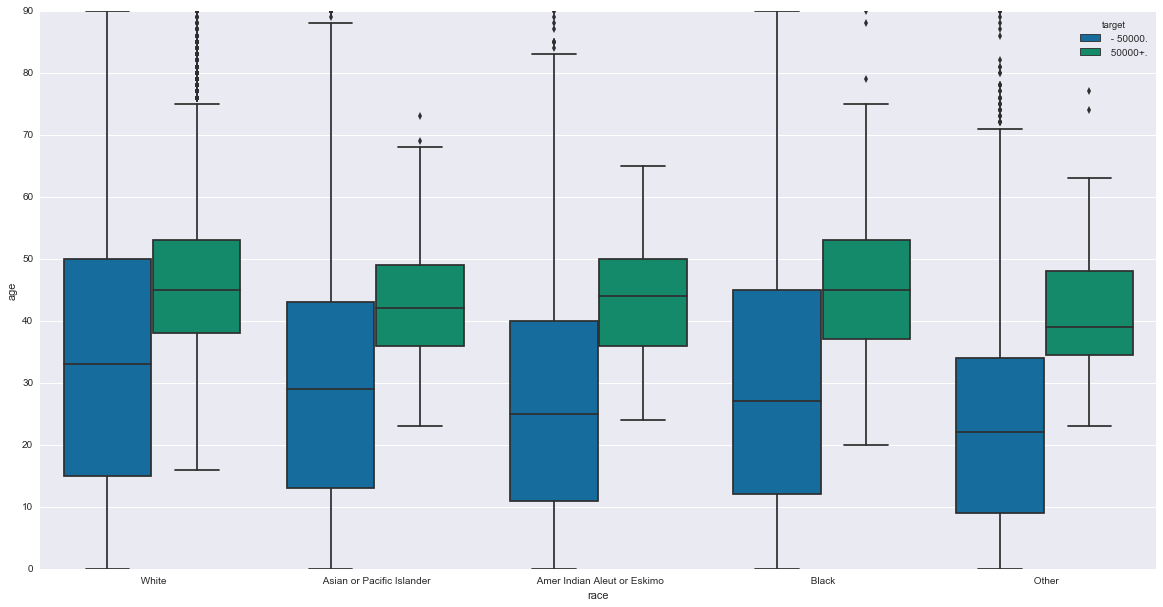

In [148]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df_train, y='age',x='race',hue='target')

Comparing Race & Age with the target variable, a relationship between age and the target variable arises. Across all races
it appears that older individuals are more likely to make $50K+ in income.

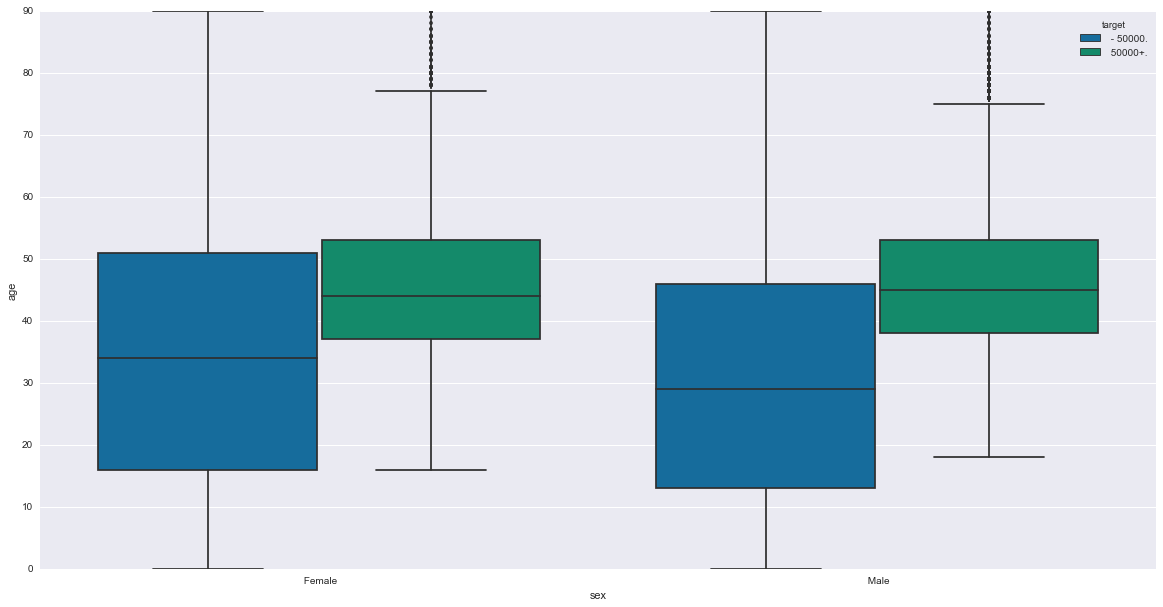

In [151]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df_train, y='age',x='sex',hue='target')

Likewise, when comparing Gender & Age with the target variable, among both females and males, age seems to be an important factor

<a id='additional outliers'></a>
## Remove additional outliers

In [8]:
def convertNaN_2(df):
    for i in df.columns:
        if i in ['industry','occupation','wage_per_hour','cap_gains','cap_losses','dividends']:
            df[i] = df[i].replace(0,np.NaN)
        if i in ['wage_per_hour','cap_gains','cap_losses','dividends']:
            df[i] = pd.DataFrame( np.where( ((df[i]-df[i].mean())/df[i].std()).abs()>3, np.NaN, df[i]))
    return df

In [9]:
%%time
df_train = convertNaN_2(df_train)
df_test = convertNaN_2(df_test)

Wall time: 266 ms


<a id='Binning & Binarisation' a></a>
## Binning Continuous Variables and Binarisation of Categorical Variables

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
df_train_X = df_train.drop(['target','instance_weight'],axis=1)
df_train_Y = df_train['target']
df_test_final = df_test.drop(['target','instance_weight'],axis=1)
df_test_final_Y = df_test['target']

In [128]:
def binning(df1,df2,columns,bins):
    for i in columns:
        df = df1.append(df2)
        minval = df[i].min()
        maxval = df[i].max()
        
        bin_size = (maxval-minval)/bins
        break_points = []
        for j in range(bins):
            break_points.append(minval+j*bin_size)
        break_points.append(maxval)
        
        df1_X = pd.cut(df1[i],bins=break_points,include_lowest=True)
        df1.drop(i,axis=1,inplace=True)
        df1 = df1.join(df1_X)
        
        df2_X = pd.cut(df2[i],bins=break_points,include_lowest=True)
        df2.drop(i,axis=1,inplace=True)
        df2 = df2.join(df2_X)
    return df1,df2

In [79]:
columns_to_bin = [df_train.columns[i] for i in iscontinuous]
columns_to_bin.remove('instance_weight')

In [157]:
%%time
df_train_X, df_test_final = binning(df_train_X,df_test_final,columns_to_bin,20)

Wall time: 2.64 s


In [82]:
#columns_to_binary = [df_train.columns[i] for i in iscategorical]
columns_to_binary = df_train_X.columns

In [83]:
def binarisation(df,columns):
    for i in columns:
        one_hot = pd.get_dummies(df[i],prefix=i)
        df.drop(i,axis=1,inplace=True)
        df = df.join(one_hot)
    return df

In [158]:
%%time
df_train_X = binarisation(df_train_X,columns_to_binary)
df_test_final = binarisation(df_test_final,columns_to_binary)

Wall time: 1min 4s


In [87]:
df_train_X.head(5)

,worker_class_ Federal government,worker_class_ Local government,worker_class_ Never worked,worker_class_ Private,worker_class_ Self-employed-incorporated,worker_class_ Self-employed-not incorporated,worker_class_ State government,worker_class_ Without pay,industry_1.0,industry_2.0,industry_3.0,industry_4.0,industry_5.0,industry_6.0,industry_7.0,industry_8.0,industry_9.0,industry_10.0,industry_11.0,industry_12.0,industry_13.0,industry_14.0,industry_15.0,industry_16.0,industry_17.0,...,"cap_losses_(2537.5, 2665]","cap_losses_(2665, 2792.5]","cap_losses_(2792.5, 2920]","cap_losses_(2920, 3047.5]","cap_losses_(3047.5, 3175]","dividends_[1, 960.95]","dividends_(960.95, 1920.9]","dividends_(1920.9, 2880.85]","dividends_(2880.85, 3840.8]","dividends_(3840.8, 4800.75]","dividends_(4800.75, 5760.7]","dividends_(5760.7, 6720.65]","dividends_(6720.65, 7680.6]","dividends_(7680.6, 8640.55]","dividends_(8640.55, 9600.5]","dividends_(9600.5, 10560.45]","dividends_(10560.45, 11520.4]","dividends_(11520.4, 12480.35]","dividends_(12480.35, 13440.3]","dividends_(13440.3, 14400.25]","dividends_(14400.25, 15360.2]","dividends_(15360.2, 16320.15]","dividends_(16320.15, 17280.1]","dividends_(17280.1, 18240.05]","dividends_(18240.05, 19200]"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#columns_to_normalize = [df_train.columns[i] for i in iscontinuous]
#columns_to_normalize.remove('instance_weight')

In [66]:
#def df_normalize(df,columns):
#    scaler = MinMaxScaler()
#    df[columns] = scaler.fit_transform(df[columns])
#    return df

<a id='Logistic Regression' a></a>

## Quick Logistic Regression

In [160]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score

In [134]:
for i in X_train.columns:
    if i in df_test_final:
        continue
    else:
        print(i)

family_status_ Grandchild <18 ever marr not in subfamily


In [163]:
# add field not in test set
df_test_final['family_status_ Grandchild <18 ever marr not in subfamily'] = 0

### Create cross-validation set from the training set

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(df_train_X,df_train_Y,test_size=0.33,random_state=42)

### Train Logistic Regression

In [137]:
%%time
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train,Y_train)

Wall time: 7.44 s


### Plot ROC and Calculate AUC Score & Accuracy Score for cross-validation set

In [138]:
y_score = log_reg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_score, pos_label=' 50000+.')
roc_auc = auc(fpr,tpr)

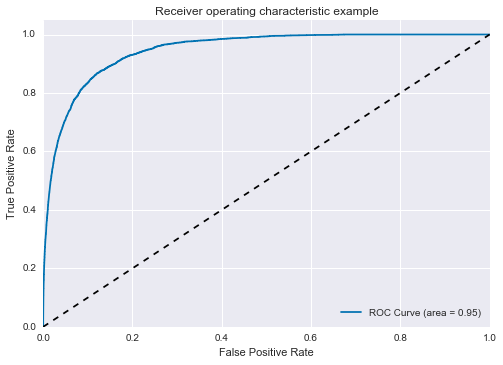

In [139]:
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Based on the ROC AUC score, simple logistic regression produces strong results on the cross validation set

In [161]:
y_pred = log_reg.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test,y_pred)))

Accuracy: 0.9549


### Plot ROC and Calculate AUC Score & Accuracy Score for test set

In [140]:
y_score = log_reg.decision_function(df_test_final)
fpr, tpr, thresholds = roc_curve(df_test_final_Y, y_score, pos_label=' 50000+.')
roc_auc = auc(fpr,tpr)

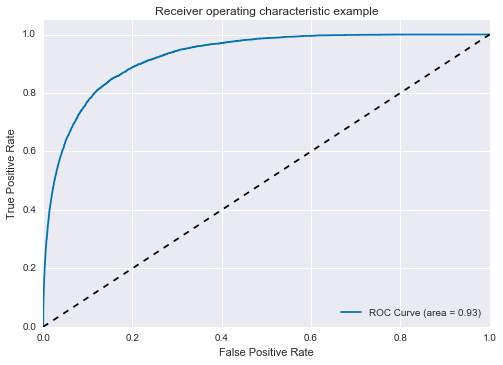

In [141]:
plt.figure()
plt.plot(fpr,tpr,label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Although the test set returned slightly lower ROC AUC score, logistic regression still produces a strong result

In [164]:
y_pred = log_reg.predict(df_test_final)
print('Accuracy: {:.4f}'.format(accuracy_score(df_test_final_Y,y_pred)))

Accuracy: 0.9495


In [210]:
print([i for i in log_reg.coef_])

[array([  1.07046309e-01,  -2.18016871e-01,   4.42041650e-01,
         2.49529190e-02,   7.46688639e-01,   6.25560191e-02,
        -5.61893373e-01,  -9.01434473e-01,   2.90901711e-02,
        -1.61695485e-01,   3.40565634e-01,  -4.96976605e-02,
        -5.15006208e-01,  -4.97675967e-01,   5.96101754e-02,
         2.21307874e-01,   7.98036823e-02,  -1.73551371e-02,
         6.75813082e-02,   2.77152472e-01,   8.35868006e-01,
         1.81531265e-01,  -2.03544303e-02,  -2.89243186e-02,
        -1.98221369e-01,  -3.75764782e-01,  -4.41069044e-01,
         1.11686303e+00,  -6.08604220e-01,  -2.41422093e-01,
         6.15789141e-03,  -2.81222570e-01,   3.03720851e-01,
         1.11981873e+00,  -4.27934008e-01,  -3.59025967e-01,
         1.24587555e-01,   1.10759762e-01,   2.39906065e-01,
        -4.76741271e-02,  -3.06267566e-01,   1.30820689e-01,
        -5.54819389e-02,  -1.05571133e-01,   2.47125321e-01,
        -4.15457998e-01,  -2.86493201e-01,  -8.96687669e-02,
        -1.59502012e-01

<a id='XGBoost' a></a>
## XGBoost - classifier

In [148]:
import xgboost as xgb

### Train XGBoost classifier

In [169]:
%%time
X_train_mod = X_train.as_matrix()
X_test_mod = X_test.as_matrix()

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train_mod,Y_train)

Wall time: 7min 48s


### Plot ROC and Calculate AUC Score & Accuracy Score for cross-validation set

In [170]:
%%time
y_score = gbm.predict_proba(X_test_mod)[:,1]
y_pred = gbm.predict(X_test_mod)

Wall time: 2.92 s


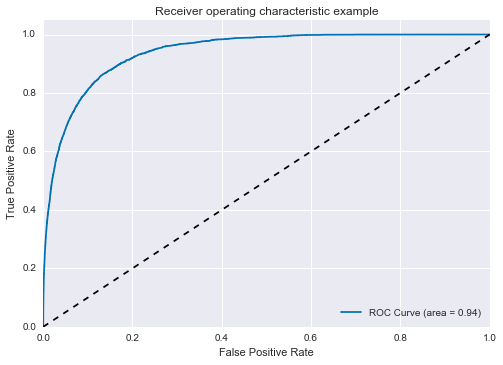

In [171]:
fpr, tpr, thresholds = roc_curve(Y_test, y_score, pos_label=' 50000+.')
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [172]:
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test,y_pred)))

Accuracy: 0.9533


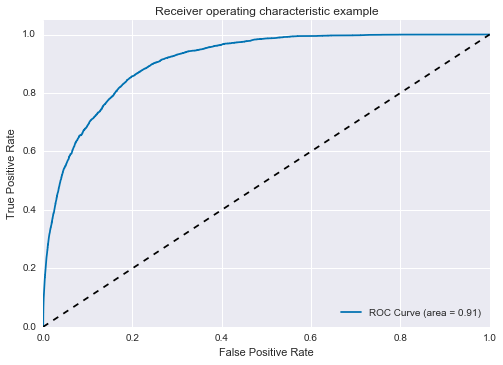

Wall time: 5.01 s


In [173]:
%%time
df_test_final_mod = df_test_final.as_matrix()
y_score = gbm.predict_proba(df_test_final_mod)[:,1]
y_pred = gbm.predict(df_test_final_mod)

fpr, tpr, thresholds = roc_curve(df_test_final_Y, y_score, pos_label=' 50000+.')
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [174]:
print('Accuracy: {:.4f}'.format(accuracy_score(df_test_final_Y,y_pred)))

Accuracy: 0.9418


Based on ROC AUC scores and Accuracy scores Logistic Regression performs better on both cross-validation and test sets. With additional time I would like to try early stopping on XGBoost, as it seems as if the boosted tree model is overfitting the data.

<a id='Feature Importances' a></a>
## Feature Importances

In [212]:
df_feature_importances = pd.DataFrame(log_reg.coef_)
df_feature_importances.columns = X_train.columns
df_feature_importances = df_feature_importances.T.sort_values(0,ascending=False).T

In [238]:
df_feature_importances.T[0:50]

,0
"cap_gains_(26891.4, 28951.2]",4.760332
"cap_gains_(24831.6, 26891.4]",4.358712
"cap_gains_(10413, 12472.8]",3.774229
"cap_gains_(12472.8, 14532.6]",3.553085
"cap_gains_(18652.2, 20712]",3.088366
"cap_losses_(2792.5, 2920]",3.088344
"cap_gains_(16592.4, 18652.2]",3.020317
"cap_losses_(2537.5, 2665]",2.983237
"dividends_(14400.25, 15360.2]",2.981910
"cap_gains_(14532.6, 16592.4]",2.926099


Among the top indicators of 50K+ income were unsurprisingly large capital gains/dividends/higher level education.

In [237]:
df_feature_importances.T.sort_values(0,ascending=True)[0:50]

,0
"cap_losses_(1645, 1772.5]",-2.001209
"cap_gains_[114, 2173.8]",-1.990005
tax_filer_status_ Nonfiler,-1.668201
"wage_per_hour_(1322.75, 1467.5]",-1.645639
state_of_prev_res_ Maryland,-1.421178
"cap_gains_(2173.8, 4233.6]",-1.408295
"wage_per_hour_(1033.25, 1178]",-1.394709
"age_(13.5, 18]",-1.324549
country_of_birth_self_ Nicaragua,-1.201547
"cap_losses_(2027.5, 2155]",-1.121111


Negative indicators of 50K+ income were notably Nonfiler tax status and indicators of "children" (i.e. education < 10th grade, younger age, etc.) Interestingly, capital gains/losses also made their way into the negative indicators; however, these were much lower than that of postiive indicators.